📌 First 5 rows of the dataset:
       LoanID   Age   Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96  56.0  85994.0     50587.0        520.0            80.0   
1  HPSK72WA7R  69.0  50432.0    124440.0        458.0            15.0   
2  C1OZ6DPJ8Y  46.0  84208.0    129188.0        451.0            26.0   
3  V2KKSFM3UN  32.0  31713.0     44799.0        743.0             0.0   
4  EY08JDHTZP  60.0  20437.0      9139.0        633.0             8.0   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0             4.0         15.23      36.0      0.44   Bachelor's   
1             1.0          4.81      60.0      0.68     Master's   
2             3.0         21.17      24.0      0.31     Master's   
3             3.0          7.07      24.0      0.23  High School   
4             4.0          6.51      48.0      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes       

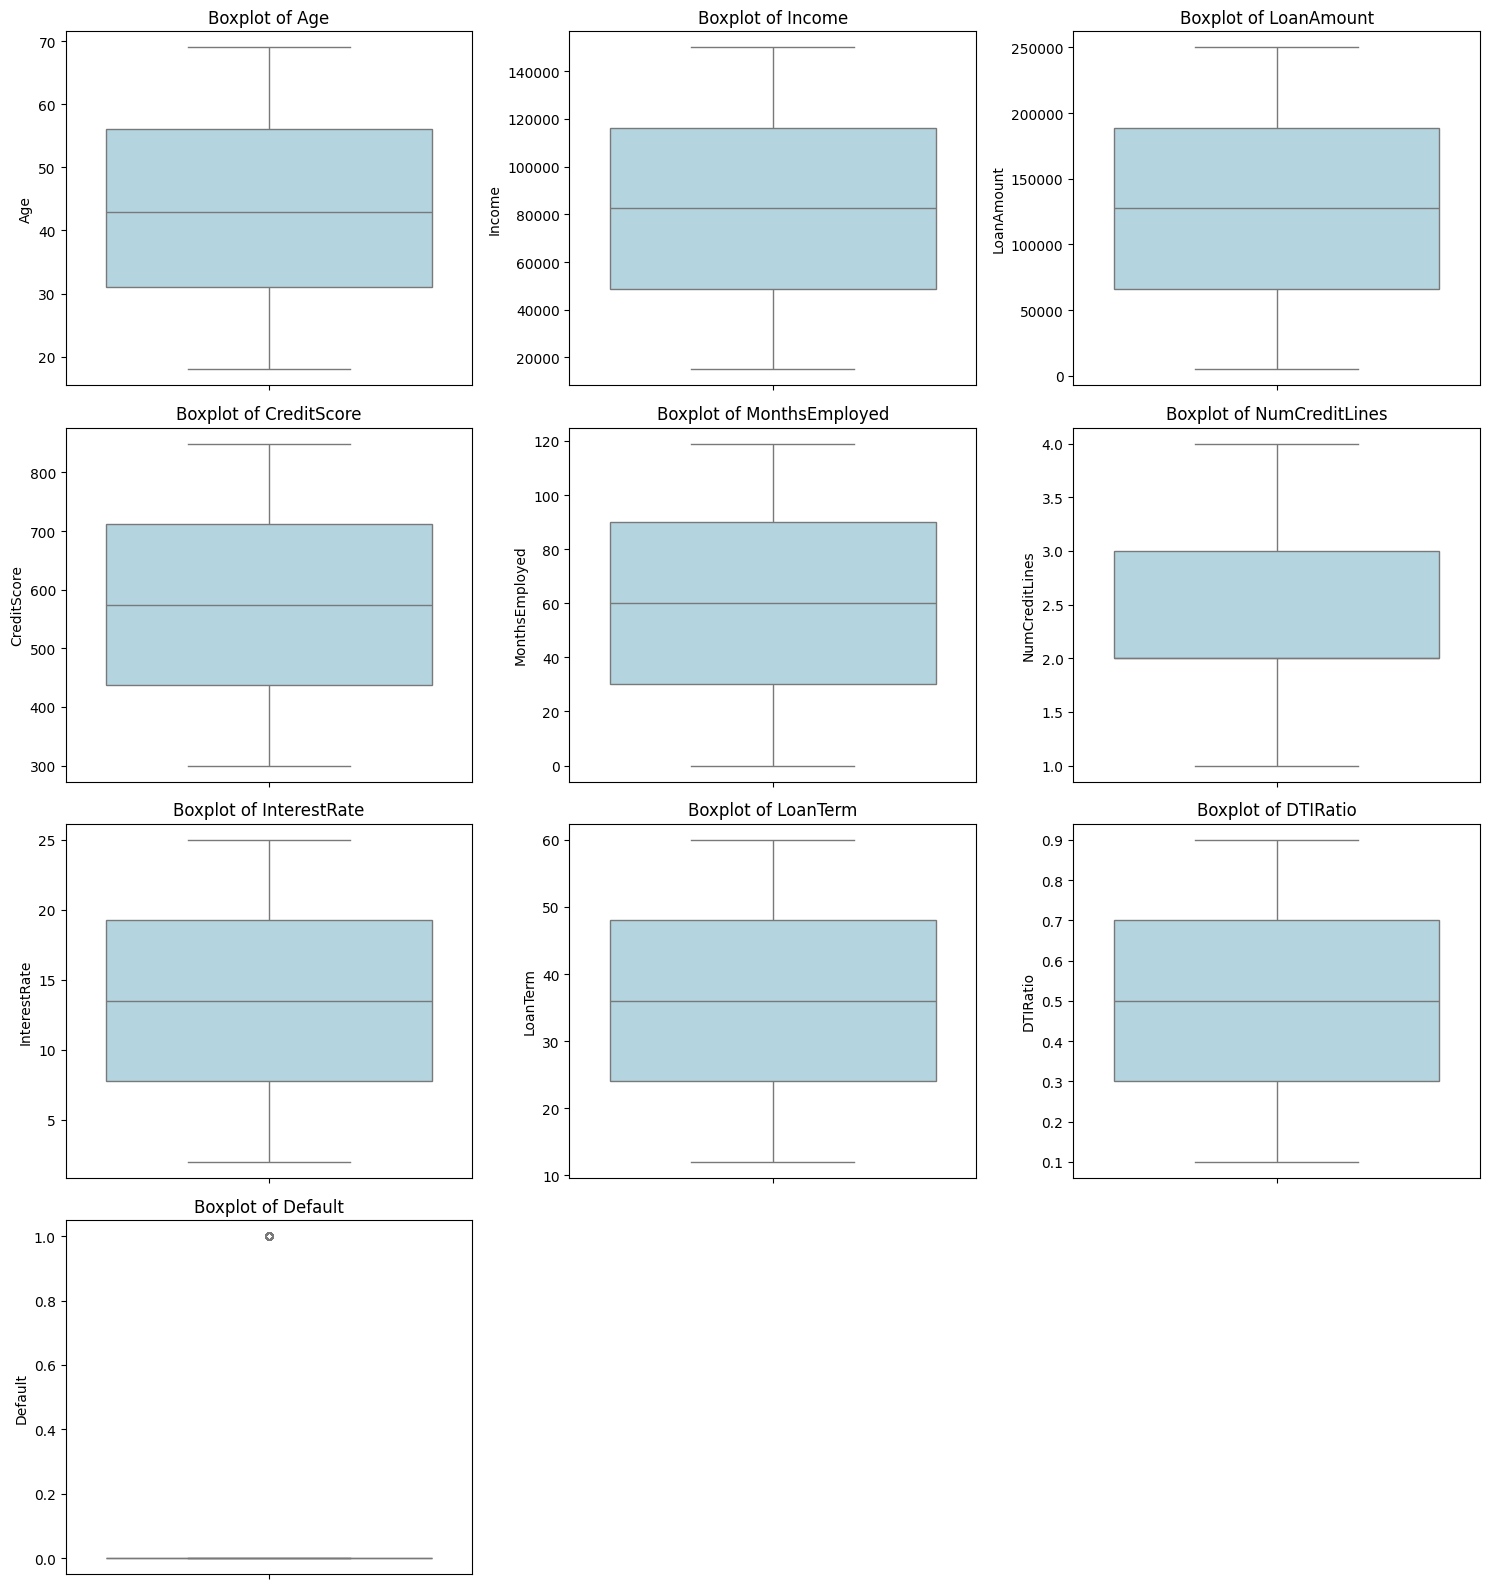

C:\Users\yings\AppData\Local\Temp\ipykernel_59696\3559887573.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", order=df[col].value_counts().index)
C:\Users\yings\AppData\Local\Temp\ipykernel_59696\3559887573.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", order=df[col].value_counts().index)


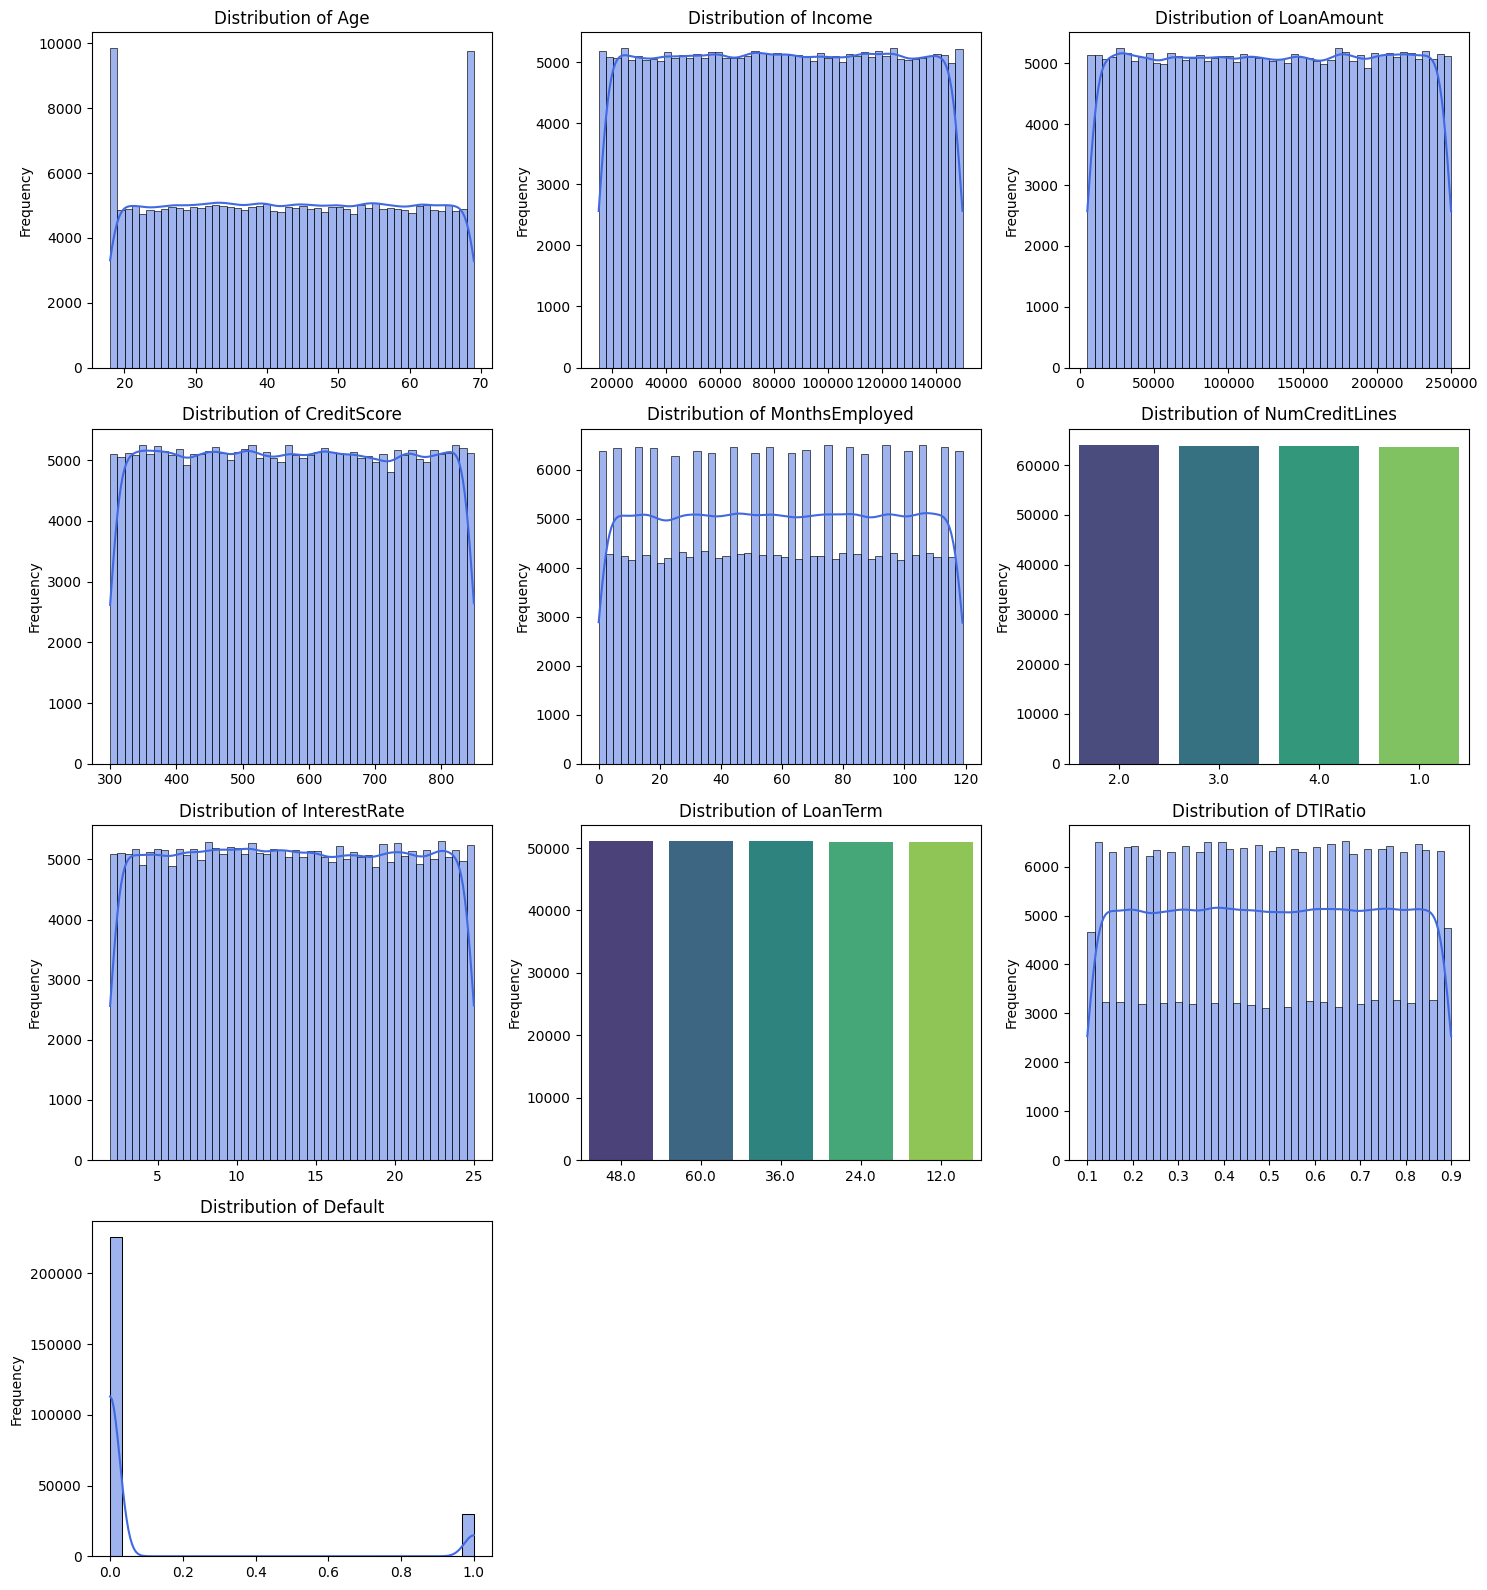


📌 Checking Skewness of Key Variables:
Income: Skewness = -0.00
LoanAmount: Skewness = -0.00


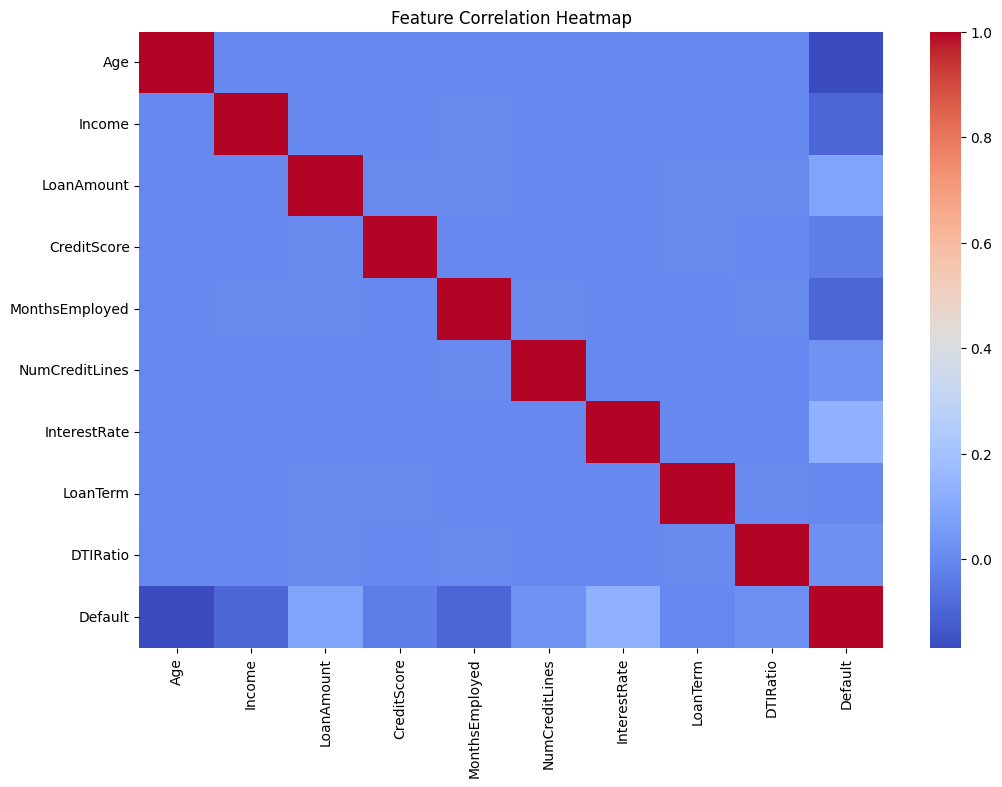

C:\Users\yings\AppData\Local\Temp\ipykernel_59696\3559887573.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default", data=df, palette="pastel")


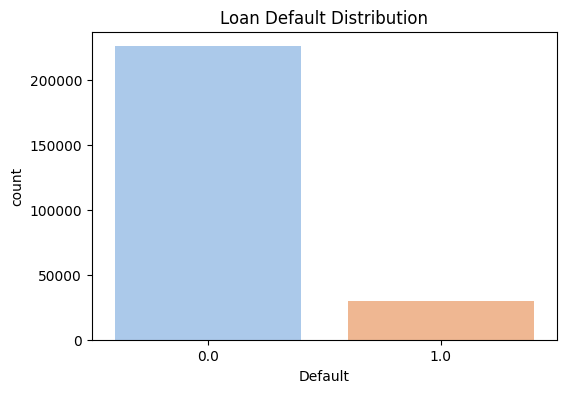

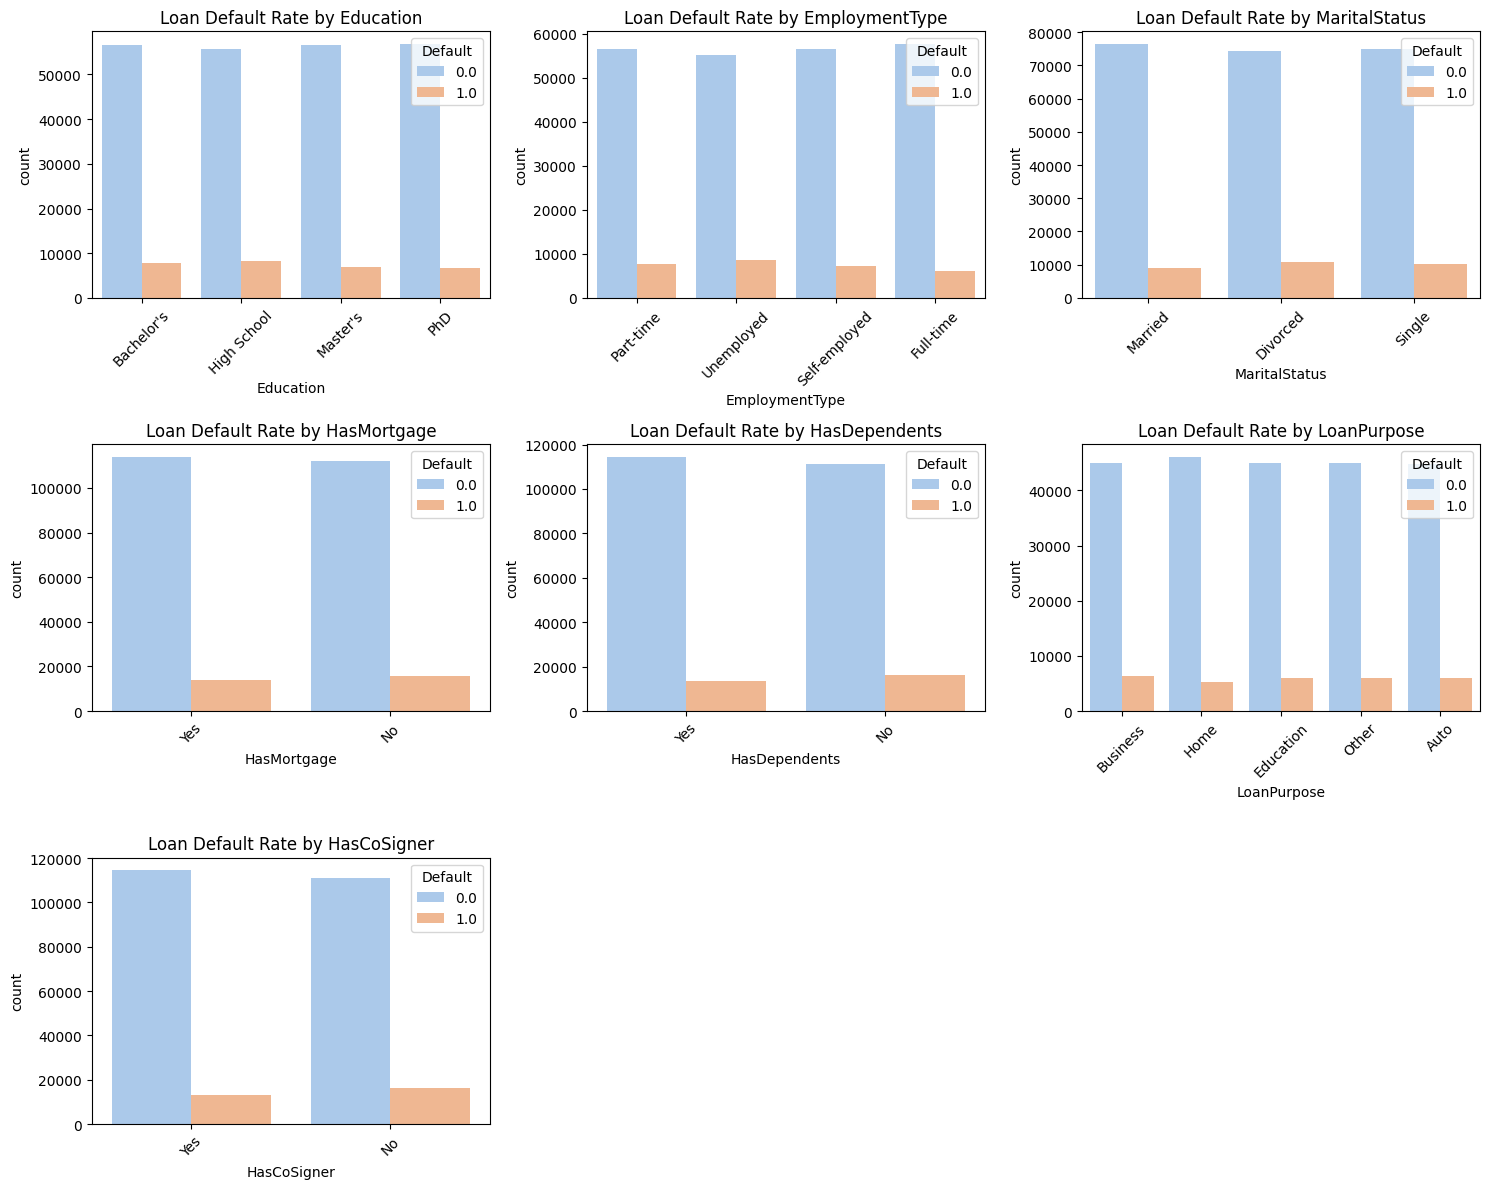


✅ EDA Completed Successfully!


In [ ]:

# 📌 Exploratory Data Analysis (EDA) for Loan Default Dataset

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# ✅ Enable Pandas Multi-Threading (CPU Optimization)
pd.set_option("compute.use_bottleneck", True)
pd.set_option("compute.use_numexpr", True)

# 1️⃣ Load the Dataset (Keep All Data)
df = pd.read_excel("../data/raw_data.xlsx")

# ✅ Reduce Memory Usage by Downcasting Numeric Data
def optimize_dataframe(df):
    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="float")
    return df

df = optimize_dataframe(df)

# Display first few rows
print("📌 First 5 rows of the dataset:")
print(df.head())

# 2️⃣ Basic Information & Summary
print("\n📌 Dataset Information:")
df.info()

# 3️⃣ Checking Missing Values
print("\n📌 Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

# 4️⃣ Checking for Duplicates
duplicate_count = df.duplicated().sum()
print(f"\n📌 Number of Duplicate Rows: {duplicate_count}")

# 5️⃣ Descriptive Statistics (Numerical and Categorical)
print("\n📌 Descriptive Statistics for Numerical Features:")
print(df.describe())

print("\n📌 Descriptive Statistics for Categorical Features:")
print(df.describe(include=['object']))

# 6️⃣ Outlier Detection (Check Extreme Values)
print("\n📌 Checking for Outliers (Top 1% & Bottom 1% Percentiles):")
for col in ["Income", "LoanAmount"]:
    print(f"{col}:\n", df[col].describe(percentiles=[0.01, 0.99]))

# 7️⃣ Improved Boxplots for Outlier Detection
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# ✅ Dynamically Adjust Subplot Grid for Boxplots
num_plots = len(numeric_cols)
rows = math.ceil(num_plots / 3)  
cols = min(3, num_plots)  

plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color="lightblue", flierprops={'marker': 'o', 'markersize': 5})
    plt.title(f"Boxplot of {col}", fontsize=12)

plt.tight_layout()
plt.show()

# 8️⃣ Improved Distribution of Numerical Features
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)

    # ✅ Handle categorical-like numerical variables separately
    if col in ["LoanTerm", "NumCreditLines"]:
        sns.countplot(x=df[col], palette="viridis", order=df[col].value_counts().index)
    else:
        # ✅ Compute bins using Freedman-Diaconis rule with safety checks
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        bin_width = 2 * iqr / (len(df[col]) ** (1/3)) if iqr > 0 else None
        
        # ✅ Check if bin_width is valid, otherwise use a fallback value
        if bin_width is None or bin_width <= 0:
            num_bins = 30  # Fallback default
        else:
            num_bins = min(50, max(10, int((df[col].max() - df[col].min()) / bin_width)))

        sns.histplot(df[col], bins=num_bins, kde=True, color="royalblue", edgecolor="black")

    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# 9️⃣ Skewness Check (Suggest Log Transform if Needed)
print("\n📌 Checking Skewness of Key Variables:")
for col in ["Income", "LoanAmount"]:
    skewness = df[col].skew()
    print(f"{col}: Skewness = {skewness:.2f}")
    if skewness > 1:
        print(f"⚠️ {col} is highly skewed! Consider applying a log transformation.")

# 🔟 Faster Correlation Heatmap (Using Spearman Method)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=["number"])  # Select only numerical columns
sns.heatmap(numeric_df.corr(method="spearman"), annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()

# 🔟 Loan Default Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x="Default", data=df, palette="pastel")
plt.title("Loan Default Distribution")
plt.show()

# 🔟 Loan Default Rate by Categorical Variables
categorical_vars = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue="Default", data=df, palette="pastel", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Loan Default Rate by {col}")

plt.tight_layout()
plt.show()

print("\n✅ EDA Completed Successfully!")
